In [42]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


import seaborn as sns
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import log_loss
from imblearn.metrics import geometric_mean_score
import warnings
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from vecstack import stacking
from scipy import stats
import os


In [19]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df_copy= df.copy()
df_copy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
df_copy['restecg'].replace(['normal', 'st-t abnormality', 'lv hypertrophy'],[0,1,2],inplace=True)
df_copy['exng'].replace([True,False],[1,0],inplace=True)
df_copy

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
df_copy['fbs'].replace([True,False],[1,0],inplace=True)
df_copy

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [26]:
## Checking missing entries in the dataset columnwise
df_copy.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [28]:
df_copy.shape

(303, 14)

In [29]:
# summary statistics of numerical columns
df_copy.describe(include =[np.number])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [37]:
cat_cols = df[['caa', 'cp', 'restecg', 'exng', 'sex', 'output']].copy()
cat_cols.head()

,caa,cp,restecg,exng,sex,output
0,0,3,0,0,1,1
1,0,2,1,0,1,1
2,0,1,0,0,0,1
3,0,1,1,0,1,1
4,0,0,1,1,0,1


In [38]:
num_cols = df[['age','trtbps','fbs','thalachh','oldpeak','slp','thall','chol']].copy()
num_cols.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol
0,63,145,1,150,2.3,0,1,233
1,37,130,0,187,3.5,0,2,250
2,41,130,0,172,1.4,2,2,204
3,56,120,0,178,0.8,2,2,236
4,57,120,0,163,0.6,2,2,354


In [43]:
sc = StandardScaler()
le = LabelEncoder()

In [44]:
for col in cat_cols.columns:
    cat_cols[col] = le.fit_transform(cat_cols[col])
        
sc_num_cols = sc.fit_transform(num_cols)
num_cols = pd.DataFrame(sc_num_cols,columns = num_cols.columns)

In [45]:
cat_cols.head()

,caa,cp,restecg,exng,sex,output
0,0,3,0,0,1,1
1,0,2,1,0,1,1
2,0,1,0,0,0,1
3,0,1,1,0,1,1
4,0,0,1,1,0,1


In [46]:
num_cols.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol
0,0.952197,0.763956,2.394438,0.015443,1.087338,-2.274579,-2.148873,-0.256334
1,-1.915313,-0.092738,-0.417635,1.633471,2.122573,-2.274579,-0.512922,0.072199
2,-1.474158,-0.092738,-0.417635,0.977514,0.310912,0.976352,-0.512922,-0.816773
3,0.180175,-0.663867,-0.417635,1.239897,-0.206705,0.976352,-0.512922,-0.198357
4,0.290464,-0.663867,-0.417635,0.583939,-0.379244,0.976352,-0.512922,2.082050


In [47]:
df_final = pd.concat([num_cols,cat_cols],axis = 1)
df_final.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol,caa,cp,restecg,exng,sex,output
0,0.952197,0.763956,2.394438,0.015443,1.087338,-2.274579,-2.148873,-0.256334,0,3,0,0,1,1
1,-1.915313,-0.092738,-0.417635,1.633471,2.122573,-2.274579,-0.512922,0.072199,0,2,1,0,1,1
2,-1.474158,-0.092738,-0.417635,0.977514,0.310912,0.976352,-0.512922,-0.816773,0,1,0,0,0,1
3,0.180175,-0.663867,-0.417635,1.239897,-0.206705,0.976352,-0.512922,-0.198357,0,1,1,0,1,1
4,0.290464,-0.663867,-0.417635,0.583939,-0.379244,0.976352,-0.512922,2.082050,0,0,1,1,0,1


In [50]:
X = df_final.drop("output",axis = 1)
y = df_final.output

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=142, stratify=y)

# decision Tree Classifier (CART) 

In [59]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

# Random Forest Classifier (criterion = 'entropy')

In [52]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

# Multi Layer Perceptron

In [53]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

# K nearest neighbour (n=9)

In [54]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

# Extra Tree Classifier (n_estimators=500)

In [55]:
et_500 = ExtraTreesClassifier(n_estimators= 500)
et_500.fit(X_train,y_train)
y_pred_et500 = et_500.predict(X_test)

# XGBoost (n_estimators=100)

In [56]:
xgb = xgb.XGBClassifier(n_estimators= 100)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

# Support Vector Classifier (kernel='linear')

In [57]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

# Stochastic Gradient Descent

In [ ]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

# Adaboost Classifier

In [58]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

# gradient boosting machine

In [60]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

# Model Selection


In [62]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [18]

model  0:     [RandomForestClassifier]
    fold  0:  [0.74418605]
    fold  1:  [0.79069767]
    fold  2:  [0.80952381]
    fold  3:  [0.76190476]
    fold  4:  [0.88095238]
    ----
    MEAN:     [0.79745293] + [0.04746479]
    FULL:     [0.79716981]

model  1:     [MLPClassifier]
    fold  0:  [0.69767442]
    fold  1:  [0.76744186]
    fold  2:  [0.80952381]
    fold  3:  [0.78571429]
    fold  4:  [0.83333333]
    ----
    MEAN:     [0.77873754] + [0.04620821]
    FULL:     [0.77830189]

model  2:     [RandomForestClassifier]
    fold  0:  [0.79069767]
    fold  1:  [0.83720930]
    fold  2:  [0.83333333]
    fold  3:  [0.76190476]
    fold  4:  [0.90476190]
    ----
    MEAN:     [0.82558140] + [0.04844882]
    FULL:     [0.82547170]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.76744186]
    fold  1:  [0.67441860]
    fold  2:  [0.78571429]
   

# Model Evaluation 

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest Classifier,0.857143,0.836364,0.92,0.780488,0.87619,0.850244,5.149093,0.712763


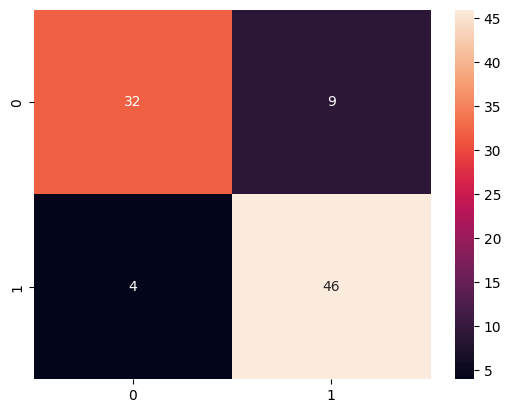

In [80]:
##Random Forest Classifier
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,decision Tree Classifier,0.747253,0.754717,0.8,0.682927,0.776699,0.741463,9.109934,0.487224


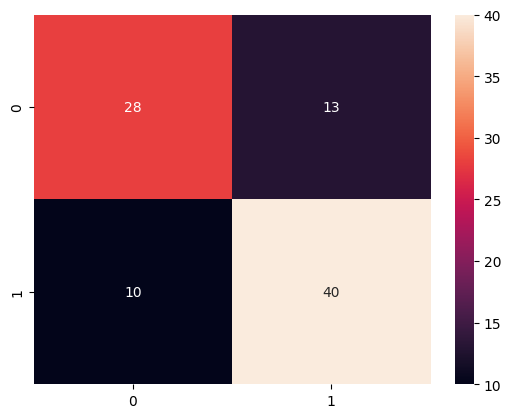

In [82]:
##decision Tree Classifier
CM=confusion_matrix(y_test,y_pred_decc)
sns.heatmap(CM, annot=True)
#TN (True Negative)
TN = CM[0][0] 
#FN (False Negative)
FN = CM[1][0]
#TP (True Positive
TP = CM[1][1]
#FP (False Positive)
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_decc)
acc= accuracy_score(y_test, y_pred_decc)
roc=roc_auc_score(y_test, y_pred_decc)
prec = precision_score(y_test, y_pred_decc)
rec = recall_score(y_test, y_pred_decc)
f1 = f1_score(y_test, y_pred_decc)

mathew = matthews_corrcoef(y_test, y_pred_decc)
model_results =pd.DataFrame([['decision Tree Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,Multi Layer Perceptron,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Classifier,0.846154,0.821429,0.92,0.756098,0.867925,0.838049,5.545177,0.691446


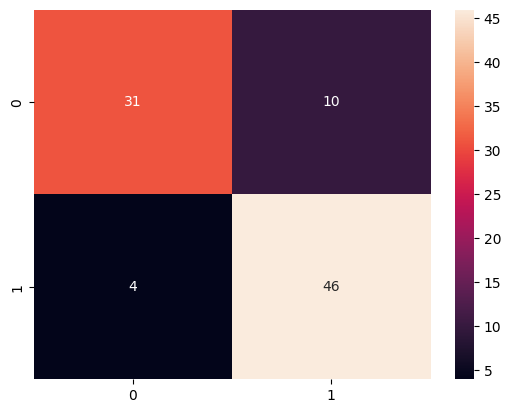

In [67]:
##Multi Layer Perceptron
CM=confusion_matrix(y_test,y_pred_mlp)
sns.heatmap(CM, annot=True)
#TN (True Negative)
TN = CM[0][0] 
#FN (False Negative)
FN = CM[1][0]
#TP (True Positive
TP = CM[1][1]
#FP (False Positive)
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_mlp)
acc= accuracy_score(y_test, y_pred_mlp)
roc=roc_auc_score(y_test, y_pred_mlp)
prec = precision_score(y_test, y_pred_mlp)
rec = recall_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp)

mathew = matthews_corrcoef(y_test, y_pred_mlp)
model_results =pd.DataFrame([['Multi Layer Perceptron',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,K nearest neighbour (n=9),Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Classifier,0.824176,0.793103,0.92,0.707317,0.851852,0.813659,6.337346,0.649222


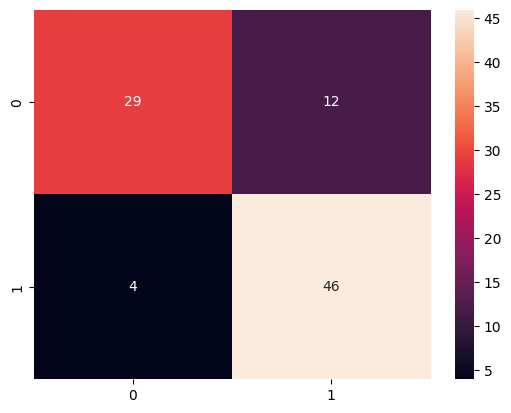

In [69]:
##K nearest neighbour (n=9)
CM=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(CM, annot=True)
#TN (True Negative)
TN = CM[0][0] 
#FN (False Negative)
FN = CM[1][0]
#TP (True Positive
TP = CM[1][1]
#FP (False Positive)
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_knn)
acc= accuracy_score(y_test, y_pred_knn)
roc=roc_auc_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

mathew = matthews_corrcoef(y_test, y_pred_knn)
model_results =pd.DataFrame([['K nearest neighbour (n=9)',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,Extra Tree Classifier (n_estimators=500),Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Classifier,0.824176,0.793103,0.92,0.707317,0.851852,0.813659,6.337346,0.649222


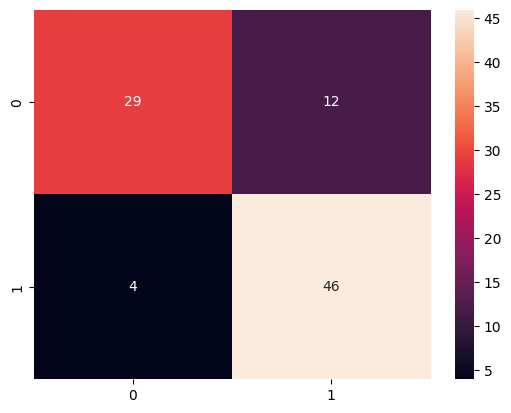

In [71]:
##Extra Tree Classifier (n_estimators=500)
CM=confusion_matrix(y_test,y_pred_et500)
sns.heatmap(CM, annot=True)
#TN (True Negative)
TN = CM[0][0] 
#FN (False Negative)
FN = CM[1][0]
#TP (True Positive
TP = CM[1][1]
#FP (False Positive)
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_et500)
acc= accuracy_score(y_test, y_pred_et500)
roc=roc_auc_score(y_test, y_pred_et500)
prec = precision_score(y_test, y_pred_et500)
rec = recall_score(y_test, y_pred_et500)
f1 = f1_score(y_test, y_pred_et500)

mathew = matthews_corrcoef(y_test, y_pred_et500)
model_results =pd.DataFrame([['Extra Tree Classifier (n_estimators=500)',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,XGBoost (n_estimators=100),Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Classifier,0.824176,0.783333,0.94,0.682927,0.854545,0.811463,6.337346,0.65397


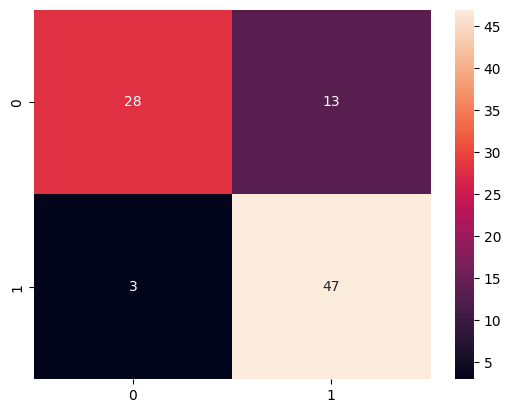

In [73]:
##XGBoost (n_estimators=100)
CM=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(CM, annot=True)
#TN (True Negative)
TN = CM[0][0] 
#FN (False Negative)
FN = CM[1][0]
#TP (True Positive
TP = CM[1][1]
#FP (False Positive)
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_xgb)
acc= accuracy_score(y_test, y_pred_xgb)
roc=roc_auc_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

mathew = matthews_corrcoef(y_test, y_pred_xgb)
model_results =pd.DataFrame([['XGBoost (n_estimators=100)',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Support Vector Classifier,0.846154,0.821429,0.92,0.756098,0.867925,0.838049,5.545177,0.691446


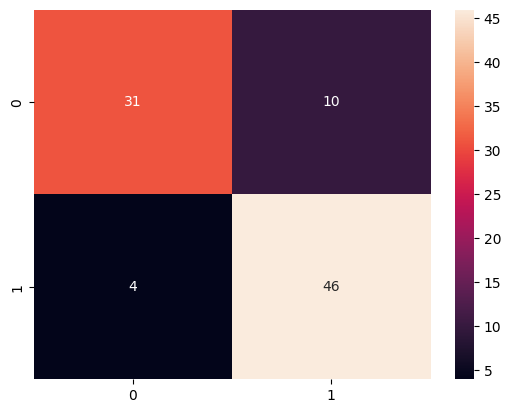

In [79]:
##Support Vector Classifier (kernel='linear')
CM=confusion_matrix(y_test,y_pred_svc)
sns.heatmap(CM, annot=True)
#TN (True Negative)
TN = CM[0][0] 
#FN (False Negative)
FN = CM[1][0]
#TP (True Positive
TP = CM[1][1]
#FP (False Positive)
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_svc)
acc= accuracy_score(y_test, y_pred_svc)
roc=roc_auc_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

mathew = matthews_corrcoef(y_test, y_pred_svc)
model_results =pd.DataFrame([['Support Vector Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

                 Model  Accuracy  Precision  Sensitivity  Specificity   
0  AdaBoost Classifier  0.791209   0.781818         0.86     0.707317  \

   F1 Score       ROC  Log_Loss  Matthews_corrcoef  
0  0.819048  0.783659  7.525598           0.577258  


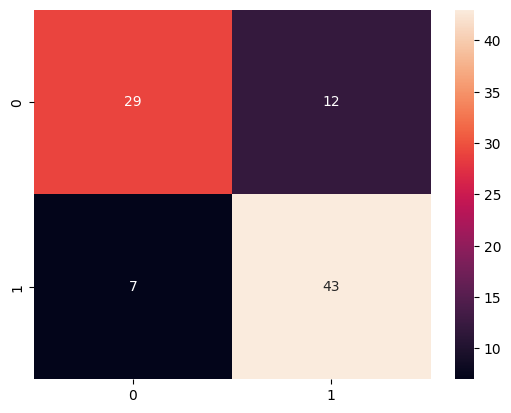

In [78]:
#Adaboost Classifier
CM = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN / (TN + FP)
loss_log = log_loss(y_test, y_pred_ada)
acc = accuracy_score(y_test, y_pred_ada)
roc = roc_auc_score(y_test, y_pred_ada)
prec = precision_score(y_test, y_pred_ada)
rec = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)

mathew = matthews_corrcoef(y_test, y_pred_ada)
model_results = pd.DataFrame([['AdaBoost Classifier', acc, prec, rec, specificity, f1, roc, loss_log, mathew]],
                             columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'Matthews_corrcoef'])

print(model_results)

            Model  Accuracy  Precision  Sensitivity  Specificity  F1 Score   
0  GBM Classifier  0.824176   0.783333         0.94     0.682927  0.854545  \

        ROC  Log_Loss  Matthews_corrcoef  
0  0.811463  6.337346            0.65397  


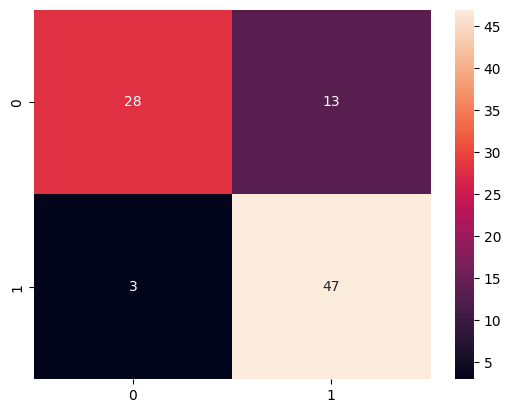

In [81]:
#gradient boosting machine
CM = confusion_matrix(y_test, y_pred_gbm)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN / (TN + FP)
loss_log = log_loss(y_test, y_pred_gbm)
acc = accuracy_score(y_test, y_pred_gbm)
roc = roc_auc_score(y_test, y_pred_gbm)
prec = precision_score(y_test, y_pred_gbm)
rec = recall_score(y_test, y_pred_gbm)
f1 = f1_score(y_test, y_pred_gbm)

mathew = matthews_corrcoef(y_test, y_pred_gbm)
model_results = pd.DataFrame([['GBM Classifier', acc, prec, rec, specificity, f1, roc, loss_log, mathew]],
                             columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'Matthews_corrcoef'])

print(model_results)

# SO SANH

In [94]:
df_copy = {'Random Forest': y_pred_rfe, 
           'MLP': y_pred_mlp, 
           'KNN': y_pred_knn, 
           'Extra Tree Classifier': y_pred_et500,
           'XGB': y_pred_xgb, 
           'SVC': y_pred_svc, 
           'Adaboost': y_pred_ada, 
           'CART': y_pred_decc, 
           'GBM': y_pred_gbm}

models = pd.DataFrame(df_copy)
model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'Matthews_corrcoef'])

for column in models:
    CM = confusion_matrix(y_test, models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test, models[column])
    acc = accuracy_score(y_test, models[column])
    roc = roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    mathew = matthews_corrcoef(y_test, models[column])
    
    results = pd.DataFrame([[column, acc, prec, rec, specificity, f1, roc, loss_log, mathew]],
                           columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'Matthews_corrcoef'])
    model_results = pd.concat([model_results, results], ignore_index=True)

print(model_results)

                   Model  Accuracy  Precision  Sensitivity  Specificity   
0          Random Forest  0.857143   0.836364         0.92     0.780488  \
1                    MLP  0.846154   0.821429         0.92     0.756098   
2                    KNN  0.824176   0.793103         0.92     0.707317   
3  Extra Tree Classifier  0.824176   0.793103         0.92     0.707317   
4                    XGB  0.824176   0.783333         0.94     0.682927   
5                    SVC  0.846154   0.821429         0.92     0.756098   
6               Adaboost  0.791209   0.781818         0.86     0.707317   
7                   CART  0.747253   0.754717         0.80     0.682927   
8                    GBM  0.824176   0.783333         0.94     0.682927   

   F1 Score       ROC  Log_Loss  Matthews_corrcoef  
0  0.876190  0.850244  5.149093           0.712763  
1  0.867925  0.838049  5.545177           0.691446  
2  0.851852  0.813659  6.337346           0.649222  
3  0.851852  0.813659  6.337346      

# #rdf chay tot nhat voi do chinh xac kiem tra len den 0.857